# Mushroom Image Classification (Simple CNN Architecture)

In [1]:
# Import the necessary library
import os
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from PIL import Image
from glob import glob
from google.colab import drive
from keras.layers.merging.add import add
import zipfile
from keras.applications import ResNet50, VGG16, VGG19
from keras.models import Sequential, Model
from keras import optimizers
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
img_width = 128
img_height = 128
batch_size_training = 64
batch_size_validation = 64

In [4]:
data_generator = ImageDataGenerator(validation_split = 0.2)

train_generator = data_generator.flow_from_directory(
    '/content/drive/My Drive/archive',
    target_size = (img_height, img_width),
    batch_size = batch_size_training,
    class_mode = 'categorical')

validation_generator = data_generator.flow_from_directory(
    '/content/drive/My Drive/archive',
    target_size = (img_height, img_width),
    batch_size = batch_size_validation,
    class_mode = 'categorical',
    subset = 'validation')

Found 3409 images belonging to 4 classes.
Found 681 images belonging to 4 classes.


In [5]:
def plot_learning_curves(hist):
    epochs = np.arange(0, len(hist.history['loss'])) + 1
    sns.set(style='ticks')
    fig, ax = plt.subplots(1, 2, figsize = (10, 4), sharex=True)
    ax[0].plot(epochs, hist.history['loss'], label = 'Training loss', marker = 'o', ls = '--')
    ax[0].plot(epochs, hist.history['val_loss'], label = 'Validation loss', marker = 'o', ls = '--')

    ax[1].plot(epochs, hist.history['accuracy'], label = 'Training accuracy', marker = 'o', ls = '--')
    ax[1].plot(epochs, hist.history['val_accuracy'], label = 'Validation accuracy', marker = 'o', ls = '--')

    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Loss vs. Epoch')
    ax[0].legend()

    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_title('Accuracy vs. Epoch')
    ax[1].legend()
    sns.despine(trim=True, offset=5)

In [16]:
cnn_model1 = Sequential()

cnn_model1.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (128, 128, 3)))
cnn_model1.add(MaxPooling2D((2, 2)))
cnn_model1.add(Conv2D(64, (3, 3), activation = 'relu'))
cnn_model1.add(MaxPooling2D((2, 2)))
cnn_model1.add(Conv2D(64, (3, 3), activation = 'relu'))
cnn_model1.add(MaxPooling2D((2, 2)))

cnn_model1.add(Flatten())
cnn_model1.add(Dense(4, activation = 'sigmoid'))

In [17]:
cnn_model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)      

In [18]:
import tensorflow as tf

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

In [19]:
cnn_model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = METRICS)

In [20]:
history = cnn_model1.fit(train_generator, epochs = 50, validation_data = validation_generator)

Epoch 1/50
54/54 [==============================] - 21s 361ms/step - loss: 14.4171 - accuracy: 0.4431 - precision: 0.2624 - recall: 0.6779 - auc: 0.5177 - val_loss: 1.3462 - val_accuracy: 0.6476 - val_precision: 0.3452 - val_recall: 0.4567 - val_auc: 0.6182
Epoch 2/50
54/54 [==============================] - 19s 353ms/step - loss: 1.3397 - accuracy: 0.5593 - precision: 0.3097 - recall: 0.6204 - auc: 0.6103 - val_loss: 1.2976 - val_accuracy: 0.5800 - val_precision: 0.3263 - val_recall: 0.6388 - val_auc: 0.6488
Epoch 3/50
54/54 [==============================] - 19s 354ms/step - loss: 1.3004 - accuracy: 0.5851 - precision: 0.3299 - recall: 0.6398 - auc: 0.6461 - val_loss: 1.3219 - val_accuracy: 0.6230 - val_precision: 0.3270 - val_recall: 0.4802 - val_auc: 0.6081
Epoch 4/50
54/54 [==============================] - 19s 348ms/step - loss: 1.2732 - accuracy: 0.5876 - precision: 0.3322 - recall: 0.6433 - auc: 0.6569 - val_loss: 1.1961 - val_accuracy: 0.5808 - val_precision: 0.3407 - val_reca

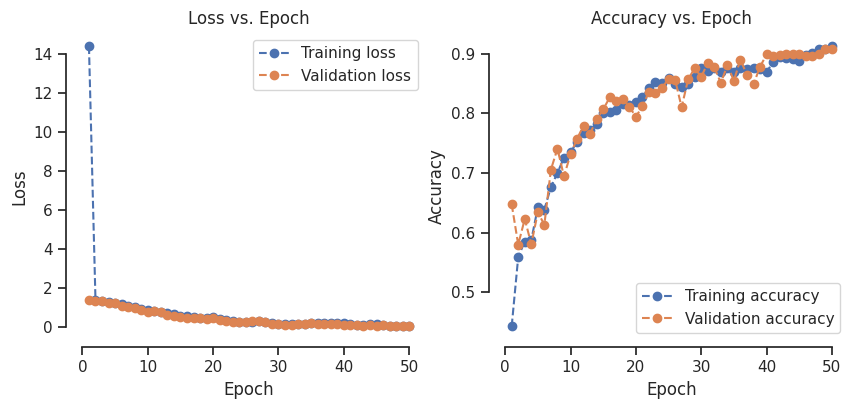

In [21]:
plot_learning_curves(history)

In [22]:
# Create a DataFrame from the history object
history_df = pd.DataFrame(history.history)

# Print the DataFrame
history_df

,loss,accuracy,precision,recall,auc,val_loss,val_accuracy,val_precision,val_recall,val_auc
0,14.417076,0.443092,0.262405,0.677911,0.517704,1.346154,0.647577,0.345172,0.456681,0.618200
1,1.339736,0.559328,0.309663,0.620417,0.610299,1.297639,0.580029,0.326332,0.638767,0.648837
2,1.300443,0.585069,0.329905,0.639777,0.646135,1.321869,0.622981,0.327000,0.480176,0.608113
3,1.273169,0.587562,0.332222,0.643297,0.656907,1.196112,0.580764,0.340705,0.723935,0.691858
4,1.216354,0.642490,0.373577,0.635377,0.701955,1.191624,0.633994,0.370704,0.665198,0.721520
5,1.183715,0.638750,0.373857,0.659431,0.704923,1.048661,0.613436,0.367710,0.759178,0.757376
6,1.063383,0.676371,0.412421,0.693458,0.760167,1.006408,0.705580,0.444342,0.709251,0.794262
7,0.990947,0.700205,0.437672,0.699325,0.786179,0.928220,0.740822,0.487310,0.704846,0.825589
8,0.913924,0.725653,0.468417,0.722206,0.811343,0.873217,0.694567,0.439745,0.809104,0.823830
9,0.858583,0.735333,0.480923,0.739513,0.822927,0.768655,0.731278,0.478112,0.817915,0.863672


In [23]:
# Get the true labels
y_true = validation_generator.classes

# Predict the probability distribution of the data
predictions = cnn_model1.predict(validation_generator, verbose=1)

# Get the predicted class
y_pred = np.argmax(predictions, axis=1)

11/11 [==============================] - 4s 389ms/step


In [34]:
cnn_model1.evaluate(validation_generator)

11/11 [==============================] - 4s 371ms/step - loss: 0.0113 - accuracy: 0.9071 - precision: 0.7388 - recall: 0.9721 - auc: 0.9819


[0.011270865797996521,
 0.9071218967437744,
 0.7388392686843872,
 0.9720998406410217,
 0.9819080233573914]

### CNN Model with Augmented Data

In [ ]:
data_generator = ImageDataGenerator(
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = data_generator.flow_from_directory(
    '/content/drive/My Drive/archive',
    target_size = (img_height, img_width),
    batch_size = batch_size_training,
    class_mode = 'categorical')

validation_generator = data_generator.flow_from_directory(
    '/content/drive/My Drive/archive',
    target_size = (img_height, img_width),
    batch_size = batch_size_validation,
    class_mode = 'categorical',
    subset = 'validation')

In [25]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2), input_shape=(img_width, img_height, 3)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(256, (3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(4, activation='softmax'))

In [26]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 64)      

In [27]:
cnn_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = METRICS)

In [28]:
history = cnn_model.fit(train_generator, epochs = 50, validation_data = validation_generator)

Epoch 1/50
54/54 [==============================] - 24s 362ms/step - loss: 2.0259 - accuracy: 0.7406 - precision: 0.4772 - recall: 0.3919 - auc: 0.6980 - val_loss: 1.6263 - val_accuracy: 0.7100 - val_precision: 0.4072 - val_recall: 0.3510 - val_auc: 0.6543
Epoch 2/50
54/54 [==============================] - 18s 341ms/step - loss: 1.3148 - accuracy: 0.7548 - precision: 0.5229 - recall: 0.2215 - auc: 0.6856 - val_loss: 1.2878 - val_accuracy: 0.7573 - val_precision: 0.5248 - val_recall: 0.3113 - val_auc: 0.6968
Epoch 3/50
54/54 [==============================] - 19s 342ms/step - loss: 1.2310 - accuracy: 0.7606 - precision: 0.5516 - recall: 0.2256 - auc: 0.7191 - val_loss: 1.5455 - val_accuracy: 0.7360 - val_precision: 0.4635 - val_recall: 0.3539 - val_auc: 0.7007
Epoch 4/50
54/54 [==============================] - 18s 339ms/step - loss: 1.1800 - accuracy: 0.7740 - precision: 0.6043 - recall: 0.2778 - auc: 0.7468 - val_loss: 1.5336 - val_accuracy: 0.7357 - val_precision: 0.4655 - val_recal

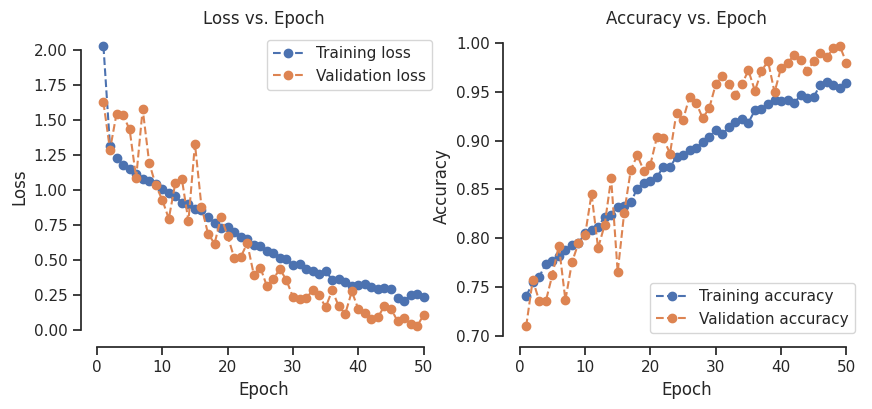

In [29]:
plot_learning_curves(history)

In [30]:
# Get the true labels
y_true = validation_generator.classes

# Predict the probability distribution of the data
predictions = cnn_model.predict(validation_generator, verbose=1)

# Get the predicted class
y_pred = np.argmax(predictions, axis=1)

11/11 [==============================] - 4s 379ms/step


In [32]:
cnn_model.evaluate(validation_generator)

11/11 [==============================] - 4s 357ms/step - loss: 0.1120 - accuracy: 0.9794 - precision: 0.9630 - recall: 0.9545 - auc: 0.9977


[0.11204615980386734,
 0.9794420003890991,
 0.9629629850387573,
 0.9544786810874939,
 0.9976917505264282]